In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf


keras_model = tf.keras.models.load_model(model_path)


In [ ]:
print(keras_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      50,466,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,469,132 (192.52 MB)

 Trainable params: 50,469,130 (192.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset/train'
val_dir = '/content/drive/MyDrive/Dataset/validation'
test_dir = '/content/drive/MyDrive/Dataset/test'

In [ ]:

img_size = 224
batch_size = 32
epochs = 10
learning_rate = 0.0001
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3536 images belonging to 14 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1177 images belonging to 14 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1184 images belonging to 14 classes.


In [ ]:
base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')


base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)


In [ ]:
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,428,015 (9.26 MB)

 Trainable params: 170,031 (664.18 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 33/259 ━━━━━━━━━━━━━━━━━━━━ 31:30 8s/step - accuracy: 0.0182 - loss: 4.3834

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


259/259 ━━━━━━━━━━━━━━━━━━━━ 2413s 9s/step - accuracy: 0.0398 - loss: 4.0149 - val_accuracy: 0.1611 - val_loss: 3.4589
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 758s 3s/step - accuracy: 0.1138 - loss: 3.4653 - val_accuracy: 0.2844 - val_loss: 3.0553
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 721s 3s/step - accuracy: 0.1975 - loss: 3.0789 - val_accuracy: 0.4076 - val_loss: 2.6974
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 704s 3s/step - accuracy: 0.2644 - loss: 2.7997 - val_accuracy: 0.4550 - val_loss: 2.4539
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 660s 3s/step - accuracy: 0.3332 - loss: 2.5310 - val_accuracy: 0.4739 - val_loss: 2.2931
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 689s 3s/step - accuracy: 0.3619 - loss: 2.3603 - val_accuracy: 0.4597 - val_loss: 2.1474
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 723s 3s/step - accuracy: 0.4076 - loss: 2.1963 - val_accuracy: 0.4976 - val_loss: 2.0465
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 692s 3s/step - accuracy: 0.4312 - loss: 2.1061 - val_accuracy: 0.50

In [ ]:
model_save_path = '/content/drive/MyDrive/Project/first_try.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/Project/first_try.h5


In [ ]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate/10),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 5
total_epochs = epochs + fine_tune_epochs

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_generator
)

Epoch 10/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 2014s 8s/step - accuracy: 0.3441 - loss: 2.4859 - val_accuracy: 0.5498 - val_loss: 1.7561
Epoch 11/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 1891s 7s/step - accuracy: 0.4609 - loss: 1.9810 - val_accuracy: 0.5924 - val_loss: 1.6916
Epoch 12/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 1963s 7s/step - accuracy: 0.5119 - loss: 1.7906 - val_accuracy: 0.5877 - val_loss: 1.6735
Epoch 13/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 1937s 7s/step - accuracy: 0.5366 - loss: 1.6382 - val_accuracy: 0.5829 - val_loss: 1.6219
Epoch 14/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 1944s 7s/step - accuracy: 0.5880 - loss: 1.5030 - val_accuracy: 0.6019 - val_loss: 1.5329
Epoch 15/15
259/259 ━━━━━━━━━━━━━━━━━━━━ 1928s 7s/step - accuracy: 0.6004 - loss: 1.4338 - val_accuracy: 0.6256 - val_loss: 1.4728


In [ ]:
model_save_path = '/content/drive/MyDrive/Project/second_try.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/Project/second_try.h5


In [ ]:
!ls /content/drive/MyDrive/Project


first_try.h5  first_try_tflite.tflite  second_try.h5  Trained_model.h5


In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/drive/MyDrive/Project/training_history.csv', index=False)




Training history saved!


In [ ]:
!cp /content/trainingNote.ipynb /content/drive/MyDrive/Project/trainingNote.ipynb


cp: cannot stat '/content/trainingNote.ipynb': No such file or directory


In [ ]:
drive.flush_and_unmount()
print("Google Drive unmounted!")

Google Drive unmounted!


In [ ]:
!ls /content/drive/MyDrive/Project


ls: cannot access '/content/drive/MyDrive/Project': No such file or directory


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

model_path = '/content/drive/My Drive/Project/fifth_try.h5'

In [ ]:
import tensorflow as tf


keras_model = tf.keras.models.load_model(model_path)

In [ ]:
print(keras_model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,428,017 (9.26 MB)

 Trainable params: 2,393,903 (9.13 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 2 (12.00 B)

None


In [ ]:
train_dir = '/content/drive/MyDrive/Dataset/train'
img_size = 224
batch_size = 32
epochs = 10
learning_rate = 0.0001
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8804 images belonging to 47 classes.


In [ ]:
test_dir = '/content/drive/MyDrive/Dataset/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2944 images belonging to 47 classes.


In [ ]:
test_loss, test_acc = keras_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1291s 14s/step - accuracy: 0.7720 - loss: 0.8232
Test Accuracy: 0.7646059989929199


In [ ]:

unfreeze_from_layer = 'block_13_expand'

set_trainable = False
for layer in keras_model.layers:
    if layer.name == unfreeze_from_layer:
        set_trainable = True
    layer.trainable = set_trainable



input_layer: Frozen
Conv1: Frozen
bn_Conv1: Frozen
Conv1_relu: Frozen
expanded_conv_depthwise: Frozen
expanded_conv_depthwise_BN: Frozen
expanded_conv_depthwise_relu: Frozen
expanded_conv_project: Frozen
expanded_conv_project_BN: Frozen
block_1_expand: Frozen
block_1_expand_BN: Frozen
block_1_expand_relu: Frozen
block_1_pad: Frozen
block_1_depthwise: Frozen
block_1_depthwise_BN: Frozen
block_1_depthwise_relu: Frozen
block_1_project: Frozen
block_1_project_BN: Frozen
block_2_expand: Frozen
block_2_expand_BN: Frozen
block_2_expand_relu: Frozen
block_2_depthwise: Frozen
block_2_depthwise_BN: Frozen
block_2_depthwise_relu: Frozen
block_2_project: Frozen
block_2_project_BN: Frozen
block_2_add: Frozen
block_3_expand: Frozen
block_3_expand_BN: Frozen
block_3_expand_relu: Frozen
block_3_pad: Frozen
block_3_depthwise: Frozen
block_3_depthwise_BN: Frozen
block_3_depthwise_relu: Frozen
block_3_project: Frozen
block_3_project_BN: Frozen
block_4_expand: Frozen
block_4_expand_BN: Frozen
block_4_expa

In [ ]:
for layer in keras_model.layers:
    print(f"{layer.name}: {'Trainable' if layer.trainable else 'Frozen'}")

input_layer: Trainable
Conv1: Frozen
bn_Conv1: Frozen
Conv1_relu: Frozen
expanded_conv_depthwise: Frozen
expanded_conv_depthwise_BN: Frozen
expanded_conv_depthwise_relu: Frozen
expanded_conv_project: Frozen
expanded_conv_project_BN: Frozen
block_1_expand: Frozen
block_1_expand_BN: Frozen
block_1_expand_relu: Frozen
block_1_pad: Frozen
block_1_depthwise: Frozen
block_1_depthwise_BN: Frozen
block_1_depthwise_relu: Frozen
block_1_project: Frozen
block_1_project_BN: Frozen
block_2_expand: Frozen
block_2_expand_BN: Frozen
block_2_expand_relu: Frozen
block_2_depthwise: Frozen
block_2_depthwise_BN: Frozen
block_2_depthwise_relu: Frozen
block_2_project: Frozen
block_2_project_BN: Frozen
block_2_add: Frozen
block_3_expand: Frozen
block_3_expand_BN: Frozen
block_3_expand_relu: Frozen
block_3_pad: Frozen
block_3_depthwise: Frozen
block_3_depthwise_BN: Frozen
block_3_depthwise_relu: Frozen
block_3_project: Frozen
block_3_project_BN: Frozen
block_4_expand: Frozen
block_4_expand_BN: Frozen
block_4_e

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights_array))

In [ ]:
from tensorflow.keras.optimizers import Adam

keras_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:

history = keras_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=4,
    class_weight=class_weights
)
model_save_path = '/content/drive/MyDrive/Project/sixth_try.h5'
keras_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 30/276 ━━━━━━━━━━━━━━━━━━━━ 52:25 13s/step - accuracy: 0.6735 - loss: 1.2119

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


276/276 ━━━━━━━━━━━━━━━━━━━━ 4853s 17s/step - accuracy: 0.6704 - loss: 1.2401 - val_accuracy: 0.7386 - val_loss: 0.9550
Epoch 2/4
276/276 ━━━━━━━━━━━━━━━━━━━━ 1189s 4s/step - accuracy: 0.6760 - loss: 1.1822 - val_accuracy: 0.7485 - val_loss: 0.9319
Epoch 3/4
276/276 ━━━━━━━━━━━━━━━━━━━━ 1183s 4s/step - accuracy: 0.6889 - loss: 1.1472 - val_accuracy: 0.7559 - val_loss: 0.8945
Epoch 4/4
276/276 ━━━━━━━━━━━━━━━━━━━━ 1223s 4s/step - accuracy: 0.7081 - loss: 1.0550 - val_accuracy: 0.7600 - val_loss: 0.8700


Model saved to /content/drive/MyDrive/Project/sixth_try.h5


In [ ]:
mmmodel_save_path = '/content/drive/MyDrive/Project/third_try.h5'
keras_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

NameError: name 'keras_model' is not defined

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)

print(d)

In [ ]:
import numpy as np


y_pred = keras_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/92 ━━━━━━━━━━━━━━━━━━━━ 11:21 10s/step

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 944s 10s/step


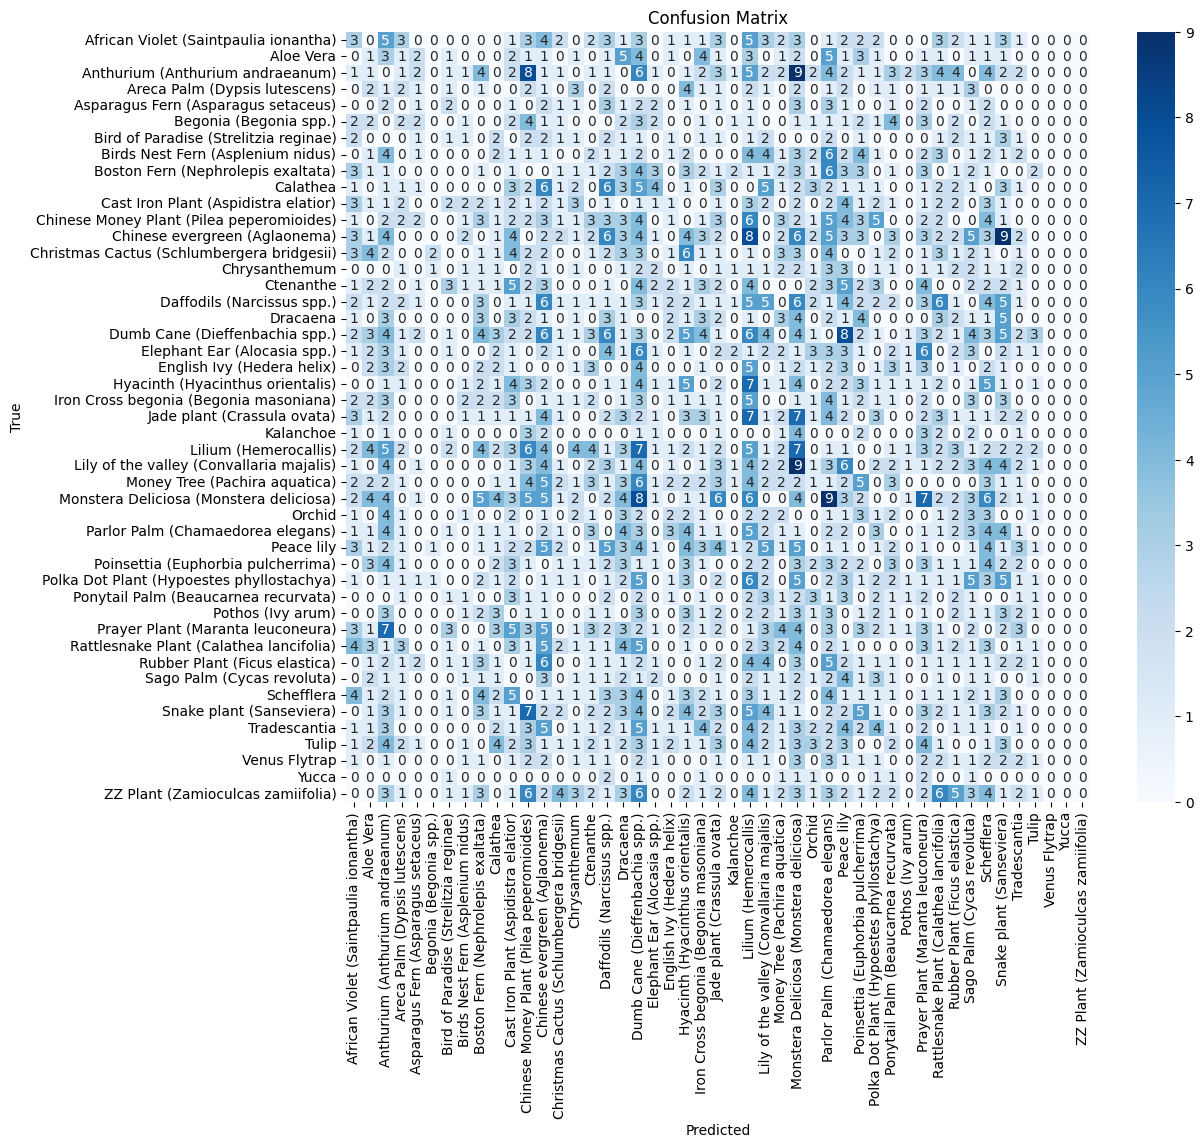

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
unfreeze_from_layer = 'block_12_expand'

set_trainable = False
for layer in keras_model.layers:
    if layer.name == unfreeze_from_layer:
        set_trainable = True
    layer.trainable = set_trainable


In [ ]:

history = keras_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=6,
    class_weight=class_weights
)
model_save_path = '/content/drive/MyDrive/Project/seventh_try.h5'
keras_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Epoch 1/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1191s 4s/step - accuracy: 0.7082 - loss: 1.0555 - val_accuracy: 0.7678 - val_loss: 0.8490
Epoch 2/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1181s 4s/step - accuracy: 0.7191 - loss: 1.0135 - val_accuracy: 0.7723 - val_loss: 0.8258
Epoch 3/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1184s 4s/step - accuracy: 0.7143 - loss: 0.9938 - val_accuracy: 0.7770 - val_loss: 0.8068
Epoch 4/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1164s 4s/step - accuracy: 0.7202 - loss: 0.9494 - val_accuracy: 0.7763 - val_loss: 0.7913
Epoch 5/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1124s 4s/step - accuracy: 0.7500 - loss: 0.9133 - val_accuracy: 0.7797 - val_loss: 0.7823
Epoch 6/6
276/276 ━━━━━━━━━━━━━━━━━━━━ 1173s 4s/step - accuracy: 0.7408 - loss: 0.9090 - val_accuracy: 0.7814 - val_loss: 0.7779


Model saved to /content/drive/MyDrive/Project/seventh_try.h5


In [ ]:
from sklearn.metrics import classification_report
import tensorflow as tf

model_path = '/content/drive/My Drive/trained_model.mlmodel'
model = tf.keras.models.load_model(model_path)
x_val, y_val = next(val_generator)
y_pred = model.predict(val_generator)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, target_names=val_generator.class_indices.keys()))


ValueError: File format not supported: filepath=/content/drive/My Drive/trained_model.mlmodel. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/drive/My Drive/trained_model.mlmodel, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
import coremltools as ct
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

def convert_mlmodel_to_h5(mlmodel_path, output_h5_path):
    """
    Converts a CoreML .mlmodel to H5 format.

    Args:
        mlmodel_path (str): Path to the CoreML model (.mlmodel file).
        output_h5_path (str): Path to save the converted H5 model.
    """

    print("Loading CoreML model...")
    coreml_model = ct.models.MLModel(mlmodel_path)


    model_spec = coreml_model.get_spec()


    print("Converting CoreML model to TensorFlow...")
    keras_model = ct.converters.tensorflow.convert(
        model_spec,
        source="mlmodel",
        input_shape=[None, 224, 224, 3],
    )


    print(f"Saving H5 model to {output_h5_path}...")
    keras_model.save(output_h5_path)
    print("Conversion complete!")



input_mlmodel = '/content/drive/My Drive/trained_model.mlmodel'
output_h5 = '/content/drive/My Drive/trained_model.h5'

convert_mlmodel_to_h5(input_mlmodel, output_h5)


ModuleNotFoundError: No module named 'coremltools'

In [ ]:
x = Dropout(0.5)(x)


Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)

In [ ]:
unfreeze_from_layer = 'block_10_expand'

set_trainable = False
for layer in keras_model.layers:
    if layer.name == unfreeze_from_layer:
        set_trainable = True
    layer.trainable = set_trainable